
<a href="https://colab.research.google.com/github/aleylani/Databehandling-AI25/blob/main/lectures/L1_pandas_basics.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;

## Lecture Notes: Pandas Basics

____

**Introduction**

Pandas is a powerful Python library for data manipulation and analysis. It provides easy-to-use data structures like Series and DataFrame, which allow for efficient handling of structured data.

This lecture will introduce key Pandas concepts and operations, providing practical examples along the way. By the end, you'll understand how to:

* Create and manipulate Pandas Series and DataFrames
* Use essential functions to filter, sort, and summarize data
* Differentiate between .iloc and .loc for indexing and selecting data
* Handle real-world datasets using CSV files

____

**Create a new environment**

Begin by creating a new environment for this course, let's call it *databehandling*

Use the following command.

        conda create --name databehandling python=3.12

After it's created, active it and run the following to install some necessary libraries for this course.

        pip install numpy pandas matplotlib openpyxl ipykernel seaborn plotly_express nbformat 

In [1]:
import random

import numpy as np
import pandas as pd

____

## Pandas Series

A Pandas Series is a one-dimensional array-like object that can hold any data type (integers, floats, strings, etc.). 

What makes a Series powerful is that it comes with labeled indices.

**Creating a Series**

We can create a series from a list, array, dictionary or scalar value.

In [2]:
# using a simple list

a_list = [x for x in range(30, 40)]
print(a_list)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [3]:
my_first_series = pd.Series(a_list)

print(my_first_series)

0    30
1    31
2    32
3    33
4    34
5    35
6    36
7    37
8    38
9    39
dtype: int64


Let's check that this really is of the class Series

In [4]:
isinstance(my_first_series, pd.Series)

True

You'll have ample time to learn more about methods and attributes of the Series class in this course. 

I highly recommend you to explore the official documentation:

https://pandas.pydata.org/docs/reference/api/pandas.Series.html

Here are some basic methods:

In [5]:
print(f'Seriens minsta värde   : {my_first_series.min()}')
print(f'Seriens maximala värde : {my_first_series.max()}')
print(f'Seriesn medelvärde     : {my_first_series.mean()}')

Seriens minsta värde   : 30
Seriens maximala värde : 39
Seriesn medelvärde     : 34.5


**Interaktion with other series**

How does an instance of class Series interact with other instances of the same, under addition, multiplication, division etc?

In [6]:
another_list = [x*10 for x in range(1, 11)]

my_second_series = pd.Series(another_list)

print(my_second_series)

0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
dtype: int64


In [7]:
# elementwise addition

my_first_series + my_second_series

0     40
1     51
2     62
3     73
4     84
5     95
6    106
7    117
8    128
9    139
dtype: int64

In [8]:
# elementwise multiplication 

my_first_series * my_second_series

0     300
1     620
2     960
3    1320
4    1700
5    2100
6    2520
7    2960
8    3420
9    3900
dtype: int64

In [9]:
# elementwise division

my_first_series / my_second_series

0    3.000000
1    1.550000
2    1.066667
3    0.825000
4    0.680000
5    0.583333
6    0.514286
7    0.462500
8    0.422222
9    0.390000
dtype: float64

We can extract individual elements from a Series by simple indexing

In [10]:
my_first_series[0] # 0 is the index of the first element

np.int64(30)

We can also do extract multiple elements from a Series

In [11]:
my_first_series[2:5] # returns all elements from index 2 to 4 (5 not included)

2    32
3    33
4    34
dtype: int64

Read more about Series in the official documentation linked above!

____

## Pandas DataFrame

A DataFrame is a 2D labeled data structure in Pandas, similar to a table or spreadsheet. 

Each column can hold different data types (integers, floats, strings, etc.).

In [12]:
#obs värdena i vår dictionary behöver INTE vara listor, du kan gott kombinera blanda annat listor, arrays & tuples

# Let's create a dictionary with some data.
# note that the 3 lists are of equal length

names = ['Ali', 'Amir', 'Rozann', 'Sawash']
age = [34, 1.6, 28, 4]
eye_color = ['brown', 'blue', 'green', 'brown']

my_dictionary = {'person' : names, 
                 'age': age, 
                 'eye color': eye_color}

for key, value in my_dictionary.items():

    print(f'{key}: {value}')

person: ['Ali', 'Amir', 'Rozann', 'Sawash']
age: [34, 1.6, 28, 4]
eye color: ['brown', 'blue', 'green', 'brown']


We now have a dictionary. We can instantly create a DataFrame from this dictionary.

In [13]:
# _df is standard naming convention to signifify that this is a DataFrame

family_df = pd.DataFrame(my_dictionary)

family_df

,person,age,eye color
0,Ali,34.0,brown
1,Amir,1.6,blue
2,Rozann,28.0,green
3,Sawash,4.0,brown


In [14]:
# we can run the .info() method to get some information about the DataFrame
# note that Dtype "object" signifies either a string or a mixed type column (e.g. strings and integers)

family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   person     4 non-null      object 
 1   age        4 non-null      float64
 2   eye color  4 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


We can select specific columns from the DataFrame using the column names.

In [15]:
family_df['person']

0       Ali
1      Amir
2    Rozann
3    Sawash
Name: person, dtype: object

Note that each individual column of a DataFrame is Series!

In [16]:
isinstance(family_df['person'], pd.Series)

True

In [17]:
# We can do simply indexing to get e.g., the first element of a column

family_df['person'][0]

'Ali'

We can get to individual colums by calling on their names as attributes aswell. 

In [18]:
# note that this method is prone to error if the name of the column contains a space or special characters

family_df.person

# this wont work
# family_df.eye color

0       Ali
1      Amir
2    Rozann
3    Sawash
Name: person, dtype: object

We can index several columns at once by passing a list of column names to the DataFrame.

In [19]:
family_df[['person', 'eye color']]

,person,eye color
0,Ali,brown
1,Amir,blue
2,Rozann,green
3,Sawash,brown


____

## Further indexing

In Pandas, selecting specific rows and columns is essential for analyzing data. Pandas offers two primary methods to do this: 

.loc[] and .iloc[].

In [20]:
# let's create some new data

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian'],
    'Age': [25, 30, 35, 40, 22, 29, 38, 42, 31],
    'Salary': [50000, 60000, 70000, 80000, 52000, 58000, 62000, 75000, 55000]
}

# create a DataFrame from the data

df = pd.DataFrame(data)

df

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,80000
4,Eva,22,52000
5,Frank,29,58000
6,Grace,38,62000
7,Helen,42,75000
8,Ian,31,55000


Before proceeding, just note that dataFrames are super flexible!

In [21]:
print(df['Salary'].mean())

62444.444444444445


**.iloc[] - Position-based Indexing**

Use .iloc[] to select data based on the position of rows and columns.

In [22]:
df.iloc[0] # Select the first row

Name      Alice
Age          25
Salary    50000
Name: 0, dtype: object

In [23]:
# we can use slicing to select mulitple rows

df.iloc[0:5] # Select rows from index 0 to 4

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,80000
4,Eva,22,52000


.iloc[] usually takes two arguments, the first for rows and the second for columns. 

The syntax is df.iloc[row_indexer, column_indexer].

In [24]:
print(df.iloc[0, 1]) # Select the element at the first row and second column
print(df.iloc[5, 2]) # Select the element at the sixth row and third column

25
58000


We can also use slicing to select multiple rows and columns.

In [25]:
df.iloc[0:3, 0:2] # Select rows 0 to 2 and columns 0 to 1

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [26]:
df.iloc[2:4, 1:3] # Select rows 2 to 3 and columns 1 to 2

,Age,Salary
2,35,70000
3,40,80000


In [27]:
df.iloc[1:4, :] # Select rows 1 to 3 and all columns

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,80000


We can also give a list of either rows/columns we want to index

In [28]:
df.iloc[[0, 2, 4], [1, 2]] # Select specific rows and columns

,Age,Salary
0,25,50000
2,35,70000
4,22,52000


**loc**

Use .loc[] to select rows and columns by their labels. This is more intuitive when working with labeled data.

In [29]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian'],
    'Age': [25, 30, 35, 40, 22, 29, 38, 42, 31],
    'Salary': [50000, 60000, 70000, 80000, 52000, 58000, 62000, 75000, 55000]
}

# create a DataFrame from the data
# NOTE that we can pass our own custom index here

df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'])

df

,Name,Age,Salary
a,Alice,25,50000
b,Bob,30,60000
c,Charlie,35,70000
d,David,40,80000
e,Eva,22,52000
f,Frank,29,58000
g,Grace,38,62000
h,Helen,42,75000
i,Ian,31,55000


Custom index does not affect the .iloc[] method, and we can use it as we did above.

In [30]:
df.iloc[4:8, 0:2]

,Name,Age
e,Eva,22
f,Frank,29
g,Grace,38
h,Helen,42


In [31]:
df.loc['b'] # Select the row with label 'b'

Name        Bob
Age          30
Salary    60000
Name: b, dtype: object

In [32]:
print(df.loc['b', 'Age']) # Select the element at row 'b' and column 'Age'

30


In [33]:
df.loc[['b', 'd', 'f'], ['Age', 'Salary']] # Select specific rows and columns

,Age,Salary
b,30,60000
d,40,80000
f,29,58000


____

## Masking

Masking is a powerful feature in Pandas that allows you to filter data based on certain conditions. It's a way to select rows or columns that meet specific criteria. Masking is often used to filter data, perform calculations, or create subsets of data for further analysis.

In [34]:
family_df

,person,age,eye color
0,Ali,34.0,brown
1,Amir,1.6,blue
2,Rozann,28.0,green
3,Sawash,4.0,brown


In [35]:
# the above df has 4 rows, so let's create a list of booleans, of the same size

my_mask = [True, False, True, False]

family_df[my_mask]  # will only show rows where our list value is True

,person,age,eye color
0,Ali,34.0,brown
2,Rozann,28.0,green


In [36]:
# we have extreme flexiblity here, we can use any condition we want to create our mask

my_color_mask = [color == 'brown' for color in family_df['eye color']]

my_color_mask

[True, False, False, True]

In [37]:
family_df[my_color_mask]

,person,age,eye color
0,Ali,34.0,brown
3,Sawash,4.0,brown


In [38]:
# Series and DataFrames have built-in support a

color_filter = family_df['eye color'] == 'brown'  # this creates a Series of booleans, which we can also use as a mask

color_filter

0     True
1    False
2    False
3     True
Name: eye color, dtype: bool

In [39]:
family_df[color_filter]

,person,age,eye color
0,Ali,34.0,brown
3,Sawash,4.0,brown


In [40]:
# we can also create and use a mask instantly aswell (not best practice though)

family_df[family_df['age'] > 10]

,person,age,eye color
0,Ali,34.0,brown
2,Rozann,28.0,green


In [41]:
# if we want to store the filtered information in a seperate df, we can easily do so.

age_mask = family_df['age'] > 10

mature_df = family_df[age_mask]

mature_df

,person,age,eye color
0,Ali,34.0,brown
2,Rozann,28.0,green


You can combine filters too!

Only rows that satisfy both conditions will then be selected.

In [42]:
print(age_mask)

print(color_filter)

0     True
1    False
2     True
3    False
Name: age, dtype: bool
0     True
1    False
2    False
3     True
Name: eye color, dtype: bool


In [43]:
family_df[age_mask & color_filter]

,person,age,eye color
0,Ali,34.0,brown


A little bit more fun, just to show how much flexibility we have in creating masks

In [44]:
df

,Name,Age,Salary
a,Alice,25,50000
b,Bob,30,60000
c,Charlie,35,70000
d,David,40,80000
e,Eva,22,52000
f,Frank,29,58000
g,Grace,38,62000
h,Helen,42,75000
i,Ian,31,55000


In [45]:
short_names_filter = [len(name) < 4 for name in df['Name']]

df[short_names_filter]

,Name,Age,Salary
b,Bob,30,60000
e,Eva,22,52000
i,Ian,31,55000


We can also NEGATE a Series. This is very handy when we want to get the oppostive of a mask.

We negate a Series using the ~ symbol.

In [46]:
age_mask

0     True
1    False
2     True
3    False
Name: age, dtype: bool

In [47]:
~age_mask # note that all True have been turned into False, and vice versa

0    False
1     True
2    False
3     True
Name: age, dtype: bool

In [48]:
family_df[~age_mask] # this now gives us the oppostive of the original mask

,person,age,eye color
1,Amir,1.6,blue
3,Sawash,4.0,brown


____

## Read excel

In [49]:
calories_df = pd.read_excel('../data/calories.xlsx')

calories_df

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [50]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [51]:
# see the first 5 rows of the dataframe

calories_df.head()

# calories_df.head(10)

# calories_df.tail(10)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [52]:
# print the unique values of a column

print(calories_df['FoodCategory'].unique())

['CannedFruit' 'Fruits' 'Tropical&ExoticFruits' 'PotatoProducts'
 'Vegetables' 'FastFood' 'Pizza' 'Cheese' 'CreamCheese'
 'Milk&DairyProducts' 'SlicedCheese' 'Yogurt' 'Beef&Veal'
 'ColdCuts&LunchMeat' 'Meat' 'Offal&Giblets' 'Pork' 'Poultry&Fowl'
 'Sausage' 'Venison&Game' 'Cakes&Pies' 'Candy&Sweets' 'IceCream'
 '(Fruit)Juices' 'AlcoholicDrinks&Beverages' 'Beer'
 'Non-AlcoholicDrinks&Beverages' 'Soda&SoftDrinks' 'Wine' 'CerealProducts'
 'Oatmeal,Muesli&Cereals' 'Pasta&Noodles' 'Dishes&Meals' 'Soups' 'Legumes'
 'Nuts&Seeds' 'Oils&Fats' 'VegetableOils' 'BakingIngredients'
 'Fish&Seafood' 'Herbs&Spices' 'Pastries,Breads&Rolls' 'Sauces&Dressings'
 'Spreads']


In [53]:
# see how many unique values this column contains

calories_df['FoodCategory'].nunique()

44

In [54]:
# see the amount of each unique value in a column

calories_df['FoodCategory'].value_counts()

FoodCategory
BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Dishes&Meals                     78
Pastries,Breads&Rolls            78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Sauces&Dressings                 54
Fruits                           54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Tropical&Exotic

In [55]:
calories_df.iloc[224]

FoodCategory                        FastFood
FoodItem            Arby’s Grand Turkey Club
per100grams                             100g
Cals_per100grams                     210 cal
KJ_per100grams                        882 kJ
Name: 224, dtype: object

In [56]:
calories_df[calories_df['FoodCategory']=='FastFood']

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
224,FastFood,Arby’s Grand Turkey Club,100g,210 cal,882 kJ
225,FastFood,Arby’s Reuben,100g,208 cal,874 kJ
226,FastFood,Arby’s Roast Beef Classic,100g,234 cal,983 kJ
227,FastFood,Arby’s Roast Beef Max,100g,234 cal,983 kJ
228,FastFood,BBQ Rib,100g,212 cal,890 kJ
...,...,...,...,...,...
291,FastFood,Wendy’s Son of Baconator,100g,321 cal,1348 kJ
292,FastFood,Whopper,100g,231 cal,970 kJ
293,FastFood,Zinger,100g,256 cal,1075 kJ
294,FastFood,Zinger Burger,100g,256 cal,1075 kJ


____

# Rename columns

In [57]:
calories_df

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [58]:
calories_df = calories_df.rename( columns={'FoodItem':'Food'} )

___

## A bit of data cleaning 

We will very often need to handle and manipulate data in dataframes, e.g.,

change column names, change element values, create new columns, handle missing data, alter values etc etc.

Let's say we want to create a new column wherein cals/100g is given as integers - not strings, as it is now.

In [59]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   Food              2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [60]:
# we can index elements in a string Series by using .str[]

calories_df['Cals_per100grams'].str[:-4] # by doing this, we remove the last 4 characters of each string in the Series which in this case is ' cal'.

0        62
1        48
2        92
3        88
4        54
       ... 
2220    617
2221    233
2222    717
2223    180
2224    286
Name: Cals_per100grams, Length: 2225, dtype: object

In [61]:
calories_df['Cals_per100grams'].str[:-4].astype(int) # we've now also converted the datatypes to integers.

0        62
1        48
2        92
3        88
4        54
       ... 
2220    617
2221    233
2222    717
2223    180
2224    286
Name: Cals_per100grams, Length: 2225, dtype: int64

Another way of doing the same thing is perhaps the following

In [62]:
# loop over each value in the Series and only keep the numbers. Exploit the fact that the we can split by a blanc space here.
# also, directly convert the number from strings to integers

only_number_portion = [int(x.split()[0]) for x in calories_df['Cals_per100grams']]

print(only_number_portion)

[62, 48, 92, 88, 54, 178, 53, 107, 81, 50, 73, 37, 76, 71, 65, 73, 71, 81, 62, 54, 35, 60, 58, 91, 53, 114, 92, 61, 243, 70, 52, 68, 48, 160, 89, 43, 50, 57, 34, 50, 47, 46, 56, 101, 282, 74, 50, 69, 41, 68, 95, 79, 61, 29, 30, 66, 53, 60, 64, 43, 44, 115, 47, 43, 97, 39, 57, 127, 49, 50, 122, 46, 83, 57, 299, 82, 52, 21, 31, 32, 239, 53, 30, 32, 42, 160, 89, 103, 34, 28, 75, 60, 147, 55, 23, 42, 68, 36, 95, 61, 71, 66, 53, 60, 73, 97, 165, 34, 53, 97, 50, 42, 122, 83, 38, 41, 82, 83, 66, 31, 239, 30, 61, 93, 87, 160, 127, 124, 124, 82, 312, 312, 133, 87, 424, 89, 89, 154, 77, 124, 185, 132, 268, 143, 331, 522, 167, 123, 132, 72, 89, 89, 149, 93, 138, 97, 67, 92, 94, 116, 82, 47, 25, 20, 25, 43, 20, 115, 34, 43, 25, 27, 41, 25, 16, 19, 100, 72, 16, 30, 32, 365, 17, 74, 16, 25, 17, 31, 149, 14, 14, 31, 115, 32, 48, 49, 27, 86, 61, 15, 22, 27, 35, 33, 115, 40, 75, 81, 27, 77, 26, 16, 31, 38, 72, 23, 45, 86, 18, 20, 28, 109, 34, 17, 210, 208, 234, 234, 212, 200, 223, 333, 255, 239, 249, 3

In [63]:
# add the new list as a new column to the dataframe

calories_df['cals/100g in integers'] = only_number_portion

In [64]:
calories_df.head()

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
0,CannedFruit,Applesauce,100g,62 cal,260 kJ,62
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ,88
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ,54


In [65]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   FoodCategory           2225 non-null   object
 1   Food                   2225 non-null   object
 2   per100grams            2225 non-null   object
 3   Cals_per100grams       2225 non-null   object
 4   KJ_per100grams         2225 non-null   object
 5   cals/100g in integers  2225 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 104.4+ KB


____

## Sort DataFrame

In [66]:
calories_df.sort_values(by='cals/100g in integers') # by default, ascending=True

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
1313,Soda&SoftDrinks,TaB,100ml,0 cal,0 kJ,0
1050,(Fruit)Juices,Chamomile Tea,100ml,0 cal,0 kJ,0
1277,Soda&SoftDrinks,Coke Zero,100ml,0 cal,0 kJ,0
2040,Herbs&Spices,Sea Salt,100g,0 cal,0 kJ,0
2038,Herbs&Spices,Salt,100g,0 cal,0 kJ,0
...,...,...,...,...,...,...
1800,VegetableOils,Salmon Oil,100ml,911 cal,3826 kJ,911
1789,VegetableOils,Menhaden Oil,100ml,911 cal,3826 kJ,911
1808,VegetableOils,Wheat Germ Oil,100ml,929 cal,3902 kJ,929
1751,Oils&Fats,Cod Liver Oil,100ml,1000 cal,4200 kJ,1000


In [67]:
calories_df.sort_values(by='cals/100g in integers', ascending=False)

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
1621,Soups,Goulash,100g,1009 cal,4238 kJ,1009
1751,Oils&Fats,Cod Liver Oil,100ml,1000 cal,4200 kJ,1000
1808,VegetableOils,Wheat Germ Oil,100ml,929 cal,3902 kJ,929
1800,VegetableOils,Salmon Oil,100ml,911 cal,3826 kJ,911
1789,VegetableOils,Menhaden Oil,100ml,911 cal,3826 kJ,911
...,...,...,...,...,...,...
1282,Soda&SoftDrinks,Diet Sunkist,100ml,0 cal,0 kJ,0
1280,Soda&SoftDrinks,Diet Dr. Pepper,100ml,0 cal,0 kJ,0
1286,Soda&SoftDrinks,Fanta Zero,100ml,0 cal,0 kJ,0
1050,(Fruit)Juices,Chamomile Tea,100ml,0 cal,0 kJ,0


In [68]:
calories_df.head(20)

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
0,CannedFruit,Applesauce,100g,62 cal,260 kJ,62
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ,88
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ,54
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ,178
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ,53
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ,107
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ,81
9,CannedFruit,Canned Fruit Salad,100g,50 cal,210 kJ,50


In [69]:
calories_df.tail(20)

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
2205,Spreads,Marmite,100g,225 cal,945 kJ,225
2206,Spreads,Marshmallow Fluff,100g,666 cal,2797 kJ,666
2207,Spreads,Nutella,100g,544 cal,2285 kJ,544
2208,Spreads,Olive Spread,100g,550 cal,2310 kJ,550
2209,Spreads,"Pâté (720), Pate",100g,319 cal,1340 kJ,319
2210,Spreads,Peanut Butter,100g,589 cal,2474 kJ,589
2211,Spreads,Peter Pan Peanut Butter,100g,609 cal,2558 kJ,609
2212,Spreads,Philadelphia Cream Cheese,100g,342 cal,1436 kJ,342
2213,Spreads,Plum Jam,100g,250 cal,1050 kJ,250
2214,Spreads,Salted Butter,100g,717 cal,3011 kJ,717


____

## Read excel with several sheets and choose header column

In [70]:
population_df = pd.read_excel('../data/komtopp50_2020.xlsx', sheet_name='Totalt', header=6)

population_df

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


reset_index of a view, and assign it to a new variable

In [71]:
sorted_df = population_df.sort_values(by=2020, ascending=False).reset_index(drop=True)

In [72]:
sorted_df

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,290,290,Bjurholm,2387,2408,-0.872093
1,289,289,Sorsele,2442,2489,-1.888309
2,288,288,Dorotea,2498,2551,-2.077617
3,287,287,Arjeplog,2718,2785,-2.405745
4,286,286,Åsele,2805,2794,0.393701
...,...,...,...,...,...,...
285,5,5,Linköping,164616,163051,0.959822
286,4,4,Uppsala,233839,230767,1.331213
287,3,3,Malmö,347949,344166,1.099179
288,2,2,Göteborg,583056,579281,0.651670


____

## Assigning and re-assigning columns in a DataFrame

In [73]:
family_df

,person,age,eye color
0,Ali,34.0,brown
1,Amir,1.6,blue
2,Rozann,28.0,green
3,Sawash,4.0,brown


In [74]:
family_df['gender'] = ['male', 'male', 'female', 'male']

In [75]:
family_df

,person,age,eye color,gender
0,Ali,34.0,brown,male
1,Amir,1.6,blue,male
2,Rozann,28.0,green,female
3,Sawash,4.0,brown,male


In [76]:
# series har stöd för elementvisa operationer

# elementvis addition nedan

family_df['age'] = family_df['age'] + 1

family_df

,person,age,eye color,gender
0,Ali,35.0,brown,male
1,Amir,2.6,blue,male
2,Rozann,29.0,green,female
3,Sawash,5.0,brown,male


In [77]:
family_df['age'] = family_df['age']*2

family_df

,person,age,eye color,gender
0,Ali,70.0,brown,male
1,Amir,5.2,blue,male
2,Rozann,58.0,green,female
3,Sawash,10.0,brown,male


In [78]:
new_colors = ['purple', 'indigo', 'violet', 'cyan']

family_df['eye color'] = new_colors

family_df

,person,age,eye color,gender
0,Ali,70.0,purple,male
1,Amir,5.2,indigo,male
2,Rozann,58.0,violet,female
3,Sawash,10.0,cyan,male


____

## Concatenate two DataFrames

In [79]:
# create and concat two dfs

more_data = {'person':['john', 'jane', 'jim'], 
             'age':[23, 24, 25], 
             'eye color':['dark', 'darker', 'lightest']}

strangers_df = pd.DataFrame(more_data)
strangers_df

,person,age,eye color
0,john,23,dark
1,jane,24,darker
2,jim,25,lightest


In [80]:
pd.concat( [family_df, strangers_df] )

,person,age,eye color,gender
0,Ali,70.0,purple,male
1,Amir,5.2,indigo,male
2,Rozann,58.0,violet,female
3,Sawash,10.0,cyan,male
0,john,23.0,dark,NaN
1,jane,24.0,darker,NaN
2,jim,25.0,lightest,NaN


____

## Plot data with Matplotlib

You're going to get **really** good at plotting in this course. Here's a soft start.

In [81]:
old_colors = ['blue', 'brown', 'green', 'brown']

family_df['eye color'] = old_colors

family_df

,person,age,eye color,gender
0,Ali,70.0,blue,male
1,Amir,5.2,brown,male
2,Rozann,58.0,green,female
3,Sawash,10.0,brown,male


In [82]:
family_df['eye color'].value_counts()

eye color
brown    2
blue     1
green    1
Name: count, dtype: int64

In [83]:
# we can get the values of a Series using .values

counts = family_df['eye color'].value_counts().values

print(counts)

[2 1 1]


In [84]:
# likewise, we can get the index of a Series using .index.values

colors = family_df['eye color'].value_counts().index.values

print(colors)

['brown' 'blue' 'green']


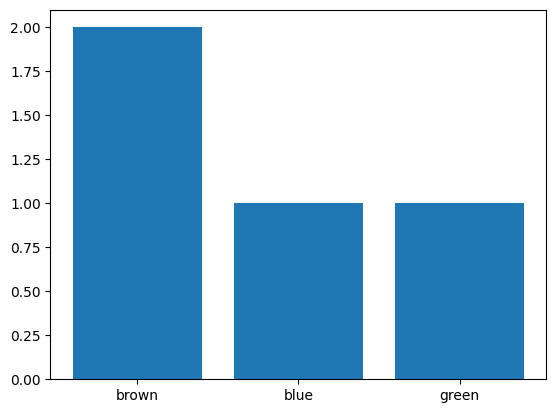

In [85]:
import matplotlib.pyplot as plt

plt.bar(colors, counts)
plt.show()

____

## Two Important Notes 



* It's VERY important that you put alot of time into being mindful with what you visualize, but also HOW you visualize it

* Furthermore, I'm going to require you to read the documentation of libraries we use. Including Pandas, Matplotlib and more. 

We will not have nearly enough time to cover every aspects of the libraries, so it's your responsibility to seek out the information you need.

____

## Read more

- [documentation - Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)

- [documentation - Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)

- [documentation - DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame)

- [documentation - read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

- [documentation - indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

- [documentation - masking](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html)

- [documentation - read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

---